In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load Cleaned Dataset
df = pd.read_csv("../data/version1.csv")

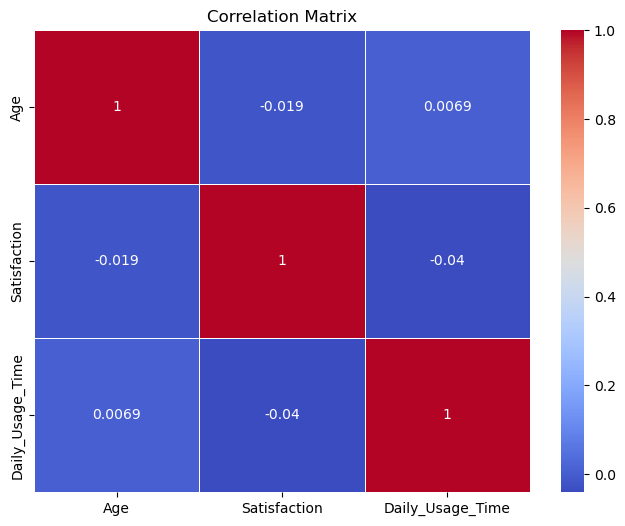

In [3]:
# Correlation Matrix & Heatmap
numerical_columns = ['Age', 'Satisfaction', 'Daily_Usage_Time']
corr_matrix = df[numerical_columns].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [4]:
# Analyze Dating App Preferences by Gender
dating_app_by_gender = df.pivot_table(index="Gender", columns="Primary_App", aggfunc="size", fill_value=0)
print(dating_app_by_gender)

Primary_App  Bumble  Hinge  OkCupid  Tinder  unknown
Gender                                              
Female           39     35       39      23       40
Male             29     29       46      28       39
Non-binary       25     42       33      25       28


In [5]:
# Check for Multiple Dating App Usage
df["Uses_Multiple_Apps"] = df["Secondary_Apps"].apply(lambda x: "Yes" if x != "unknown" else "No")
multiple_apps_summary = df.groupby("Uses_Multiple_Apps")["Age"].count()
print(multiple_apps_summary)

Uses_Multiple_Apps
No     114
Yes    386
Name: Age, dtype: int64


In [10]:
# Age Group Analysis
df["Age_Group"] = pd.cut(df["Age"], bins=[18, 24, 30, 40, 50], labels=["18-24", "25-30", "31-40", "41-50"])
age_activity = df.groupby("Age_Group")["Daily_Usage_Time"].mean()
print(age_activity)

Age_Group
18-24    98.097686
25-30    97.777778
31-40          NaN
41-50          NaN
Name: Daily_Usage_Time, dtype: float64


C:\Users\Edmund\AppData\Local\Temp\ipykernel_4424\1542055565.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_activity = df.groupby("Age_Group")["Daily_Usage_Time"].mean()


In [11]:
# Urban vs. Rural Usage Comparison
location_usage = df.groupby("Location")["Daily_Usage_Time"].mean()
print(location_usage)

Location
Bangalore     93.043478
Chennai       91.363636
Delhi        101.052632
Hyderabad    110.156250
Kolkata       92.368421
Mumbai       102.073171
Pune          97.611940
Name: Daily_Usage_Time, dtype: float64


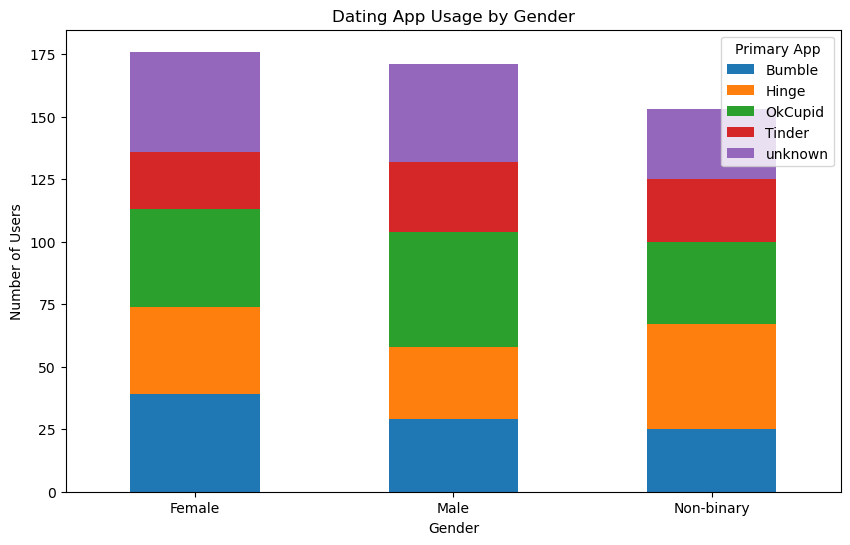

In [12]:
# Stacked Bar Chart: Dating App Usage by Gender
dating_app_by_gender.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.title("Dating App Usage by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Users")
plt.xticks(rotation=0)
plt.legend(title="Primary App")
plt.show()

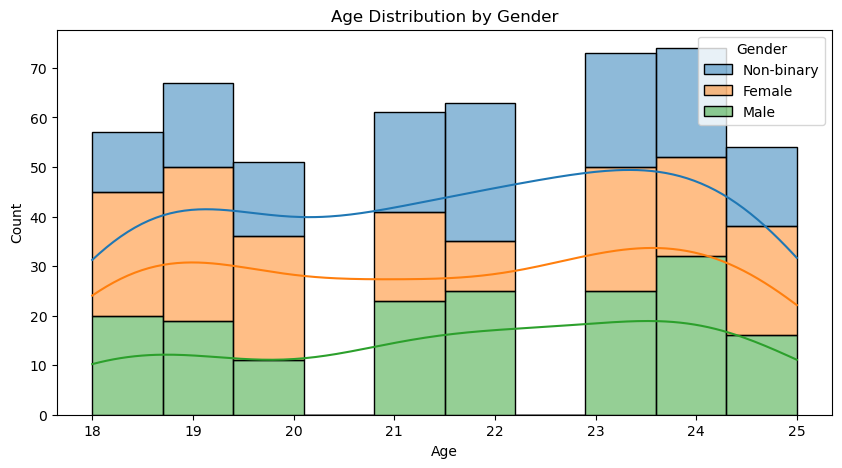

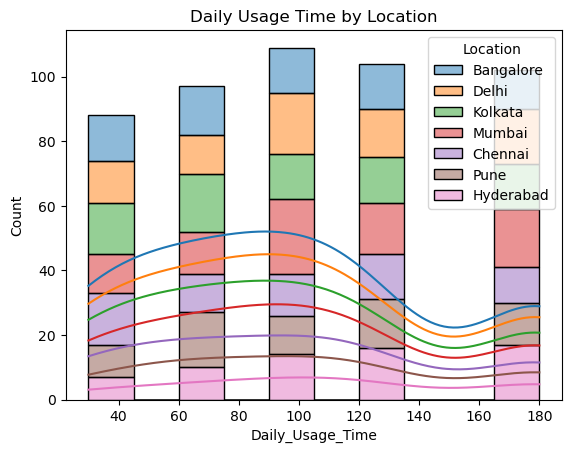

In [13]:
# Detecting Patterns & Bias in Data
plt.figure(figsize=(10, 5))
sns.histplot(df, x="Age", hue="Gender", multiple="stack", kde=True)
plt.title("Age Distribution by Gender")
plt.show()

sns.histplot(df, x="Daily_Usage_Time", hue="Location", multiple="stack", kde=True)
plt.title("Daily Usage Time by Location")
plt.show()

In [15]:
# Identify Overrepresented & Underrepresented Groups
gender_counts = df["Gender"].value_counts(normalize=True) * 100
print("Gender Distribution (%):\n", gender_counts)
print("\n\n")
location_counts = df["Location"].value_counts(normalize=True) * 100
print("Location Distribution (%):\n", location_counts)

Gender Distribution (%):
 Gender
Female        35.2
Male          34.2
Non-binary    30.6
Name: proportion, dtype: float64



Location Distribution (%):
 Location
Mumbai       16.4
Delhi        15.2
Kolkata      15.2
Bangalore    13.8
Pune         13.4
Chennai      13.2
Hyderabad    12.8
Name: proportion, dtype: float64


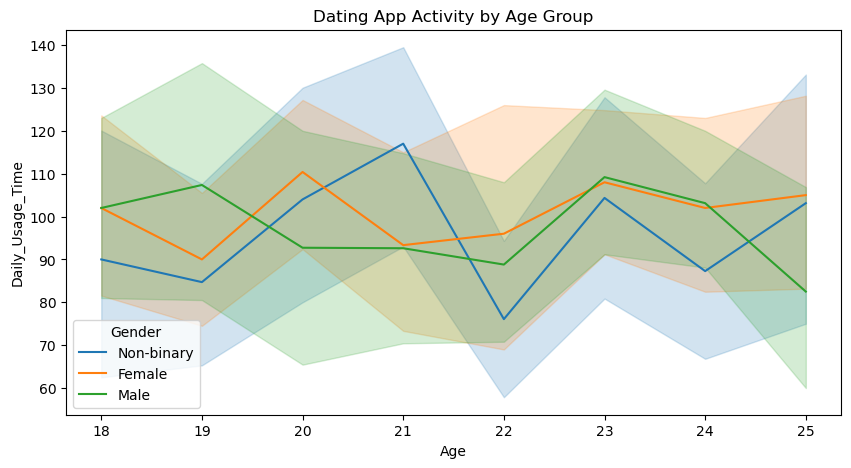

In [17]:
# Temporal & Regional Trends
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x="Age", y="Daily_Usage_Time", hue="Gender")
plt.title("Dating App Activity by Age Group")
plt.show()

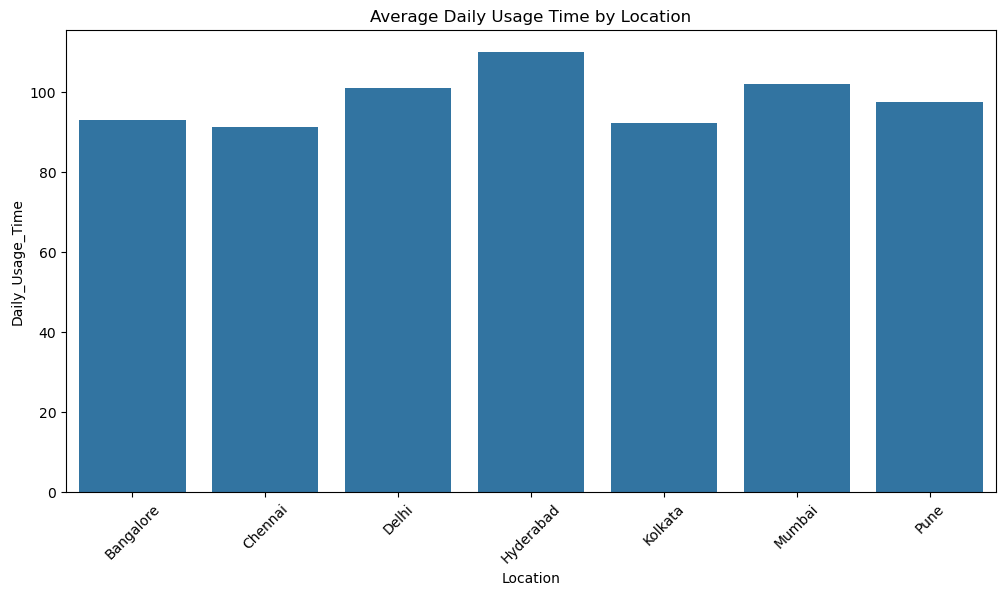

In [20]:
# Assuming 'City' column exists
df_city_usage = df.groupby("Location")["Daily_Usage_Time"].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=df_city_usage, x="Location", y="Daily_Usage_Time")
plt.title("Average Daily Usage Time by Location")
plt.xticks(rotation=45)
plt.show()

C:\Users\Edmund\AppData\Local\Temp\ipykernel_4424\4150266576.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  app_popularity = df.groupby(["Age_Group", "Primary_App"]).size().reset_index(name="User_Count")


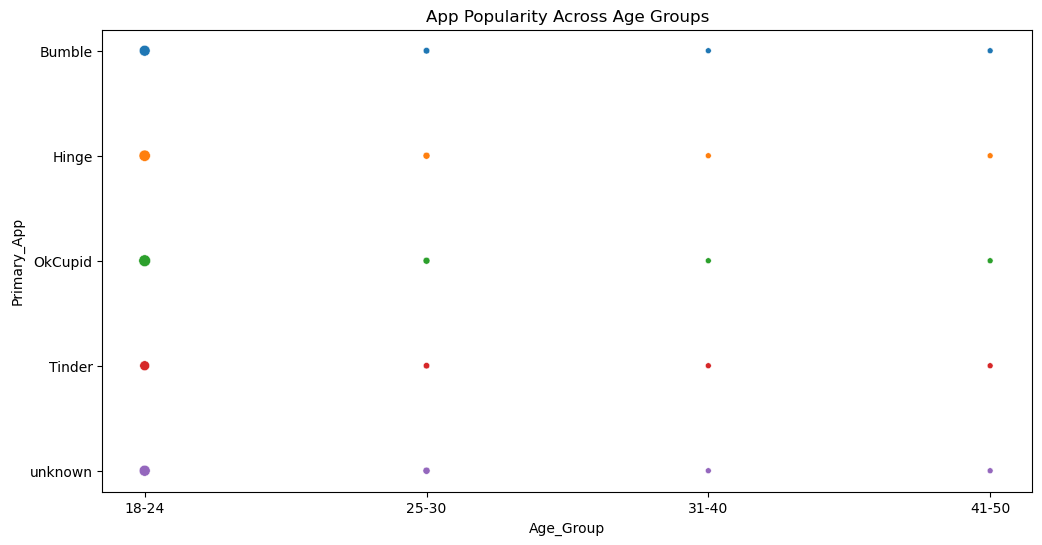

In [22]:
# Bubble Chart - Age Group & App Popularity
app_popularity = df.groupby(["Age_Group", "Primary_App"]).size().reset_index(name="User_Count")
plt.figure(figsize=(12, 6))
sns.scatterplot(data=app_popularity, x="Age_Group", y="Primary_App", size="User_Count", hue="Primary_App", legend=False)
plt.title("App Popularity Across Age Groups")
plt.show()